# Numerical Project in Python - Cooperative Kernel regression
## Ahmed Yassine Chraa - Emma de Charry - Pauline Zhou



## Part I - Class 1 & 2

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import old.dgd as dgd
import methods.utils as utils
from methods.utils import *
from methods.dgd import *
from methods.dual_decomposition import *
from methods.admm import *
from methods.gradient_tracking import *
from methods.fedavg2 import *

In [21]:
with open('first_database.pkl', 'rb') as f:
     x, y = pickle.load(f)
    
n = 100
m = 10
a = 5
sigma2 = 0.25
nu = 1
beta = 10
n_epochs1 = 100
n_epochs = 10000
sigma = 0.5
lr = 0.01

# Generate data
x_n = x[:n] 
y_n = y[:n]

sel = [i for i in range(n)]
ind = np.random.choice(sel, m, replace=False)
x_selected = np.array([x[i] for i in ind])
Kmm = compute_kernel_matrix(x_selected, x_selected)
Knm = compute_kernel_matrix(x_n, x_selected)
alpha_star = compute_alpha_star(Kmm, Knm, y_n, sigma2, nu)
#W = np.ones((a, a))
W = utils.W_base_bis(a)
K = compute_kernel_matrix(x_n, x_n)
selected_pts_agents = np.array_split(np.random.permutation(n), a)
step_size = 0.002

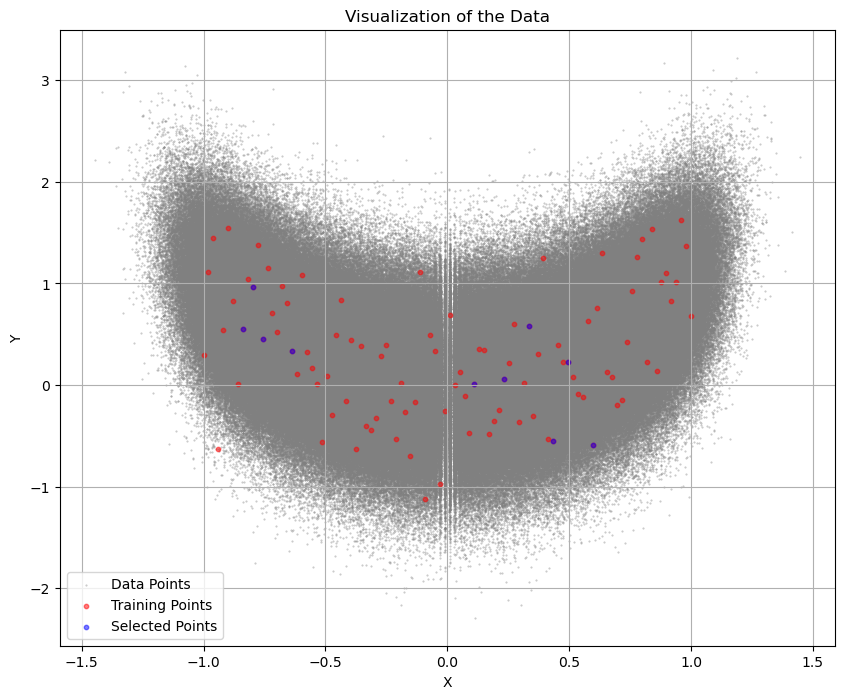

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='gray',s=0.2, alpha=0.5, label='Data Points')
plt.scatter(x_n, y_n, color='red',s=10, alpha=0.5, label='Training Points')
plt.scatter(x_selected, [y[i] for i in ind], color='blue',s=10, alpha=0.5, label='Selected Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of the Data')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def plot_me(x, y, alpha, ind, selection=True):

    plt.plot(x, y,'o')

    xo = np.linspace(-1,1,100)
    if selection:
        x2 = [x[i] for i in ind]
    else:
        x2 = np.linspace(-1, 1, 10)

    xo = np.array(xo)
    x2 = np.array(x2)
    yo = compute_kernel_matrix(xo, x2) @ alpha
    plt.plot(xo, yo, '-')
    plt.xlabel(r'Features')
    plt.ylabel(r'Labels')
    plt.title('Reconstruction')
    plt.grid()

    plt.show()

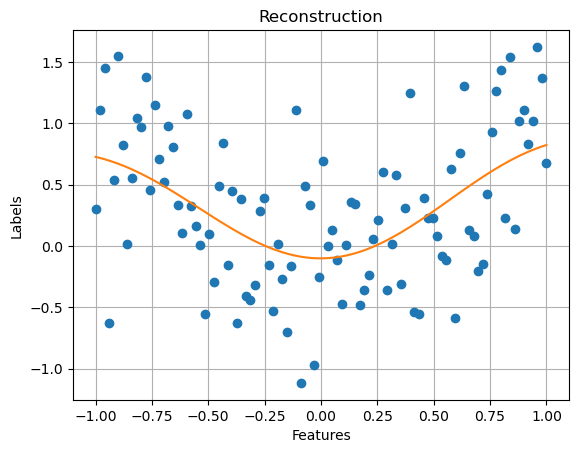

In [7]:
plot_me(x_n, y_n, alpha_star, ind, selection=True)

 ## Decentralized gradient descent

Time to compute alpha optimal : 0.00039315223693847656

Optimal alpha : [-0.15128132  0.23532243  0.02672275 -0.32830091 -0.31328754  0.57617038
  0.88857808  0.77919528 -0.33814281 -0.17697765]

alpha optimal with DGD : [-0.00083889  0.17419978 -0.00655673  0.01569296  0.06463127 -0.00886542
  0.27711165 -0.00701551  0.05585899  0.0004892 ]
Time to compute alpha optimal with DGD : 9.311673879623413


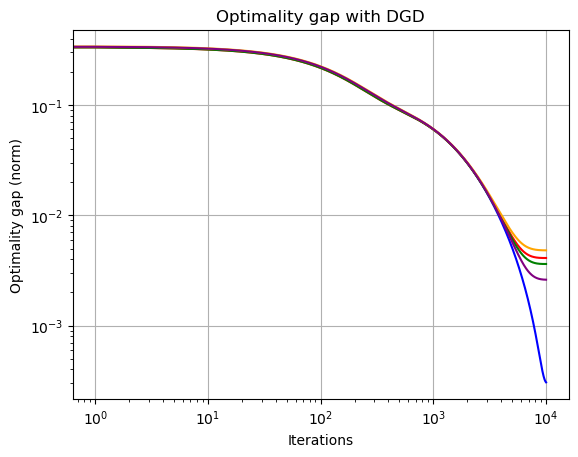

In [19]:
start = time.time()
alpha_optimal = compute_alpha_star(Kmm, Knm, y_n, sigma2, nu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'Optimal alpha : {alpha_optimal}\n')
start = time.time()

opt_gaps, alpha_optim, alpha_list, alpha_mean_list = DGD(
        x_n, y_n, x_selected, a, nu, sigma2, alpha_optimal, W, step_size, n_epochs)
end = time.time()
print(f'alpha optimal with DGD : {alpha_optim}')
print(
    f'Time to compute alpha optimal with DGD : {end - start}')
# print(f'Total iterations : {tot_ite}\n')

# Data visualization
Y = np.linalg.norm(alpha_list - alpha_optim, axis=1)
# unpack the list of alpha to get for each agent the evolution of alpha
agent_1 = np.linalg.norm(np.array(
    [alpha_list[i][0] for i in range(len(alpha_list))]) - alpha_optim, axis=1)
agent_2 = np.linalg.norm(np.array(
    [alpha_list[i][1] for i in range(len(alpha_list))]) - alpha_optim, axis=1)
agent_3 = np.linalg.norm(np.array(
    [alpha_list[i][2] for i in range(len(alpha_list))]) - alpha_optim, axis=1)
agent_4 = np.linalg.norm(np.array(
    [alpha_list[i][3] for i in range(len(alpha_list))]) - alpha_optim, axis=1)
agent_5 = np.linalg.norm(np.array(
    [alpha_list[i][4] for i in range(len(alpha_list))]) - alpha_optim, axis=1)

plt.plot(agent_1, label='Agent 1', color='blue')
plt.plot(agent_2, label='Agent 2', color='red')
plt.plot(agent_3, label='Agent 3', color='green')
plt.plot(agent_4, label='Agent 4', color='orange')
plt.plot(agent_5, label='Agent 5', color='purple')
plt.xlabel('Iterations')
plt.ylabel('Optimality gap (norm)')
plt.xscale("log")
plt.yscale("log")
plt.title('Optimality gap with DGD')
#plt.savefig('opt_gaps_DGD_with_agents_scalelog.png', bbox_inches='tight')
plt.grid()
plt.show()

## Gradient Tracking

In [11]:
Kmm = compute_kernel_matrix(x_selected, x_selected)
Knm = compute_kernel_matrix(x_n, x_selected)
start = time.time()
alpha_star = compute_alpha_star(Kmm, Knm, y_n, sigma2, nu)
end = time.time()

print(f'Time to compute alpha star : {end - start}\n')
print(f'Optimal alpha : {alpha_star}\n')

W = np.ones((a,a))
K = compute_kernel_matrix(x_n, x_n)

n_epochs = 100
lr = 0.002

start = time.time()
opt_gaps_GT, alpha_optim_GT, alpha_list_GT, alpha_mean_list_GT = gradient_tracking(
    x_n, y_n, x_selected, a, nu, sigma2, alpha_star, W, lr, n_epochs=10000)
end = time.time()

print(f'alpha optimal with GT : {alpha_optim_GT}')
print(f'Time to compute alpha optimal with GT : {end - start}')

Time to compute alpha star : 0.0002732276916503906

Optimal alpha : [-0.29631768 -0.17017619  0.60505678 -0.31084488  0.57891295  0.66079065
  0.45449954  0.24063941 -0.28918399 -0.28683204]

alpha optimal with GT : [ 0.01216566  0.06948794  0.20977806  0.03147042  0.2043928  -0.00715073
 -0.00814396 -0.00808908  0.04059388  0.01026504]
Time to compute alpha optimal with GT : 9.711170673370361


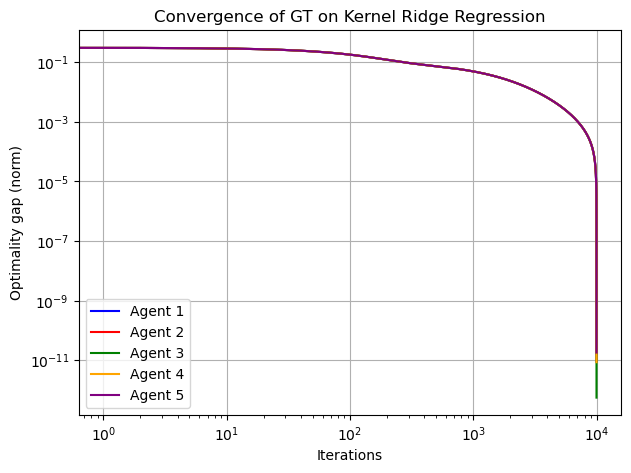

In [12]:
# Data visualization
alpha_list_GT = np.array(alpha_list_GT)
alpha_optim_GT = np.array(alpha_optim_GT)

# Calcul des écarts d'optimalité pour chaque agent
agent_1_GT = np.linalg.norm(np.array([alpha_list_GT[i][0] for i in range(len(alpha_list_GT))]) - alpha_optim_GT, axis=1)
agent_2_GT = np.linalg.norm(np.array([alpha_list_GT[i][1] for i in range(len(alpha_list_GT))]) - alpha_optim_GT, axis=1)
agent_3_GT = np.linalg.norm(np.array([alpha_list_GT[i][2] for i in range(len(alpha_list_GT))]) - alpha_optim_GT, axis=1)
agent_4_GT = np.linalg.norm(np.array([alpha_list_GT[i][3] for i in range(len(alpha_list_GT))]) - alpha_optim_GT, axis=1)
agent_5_GT = np.linalg.norm(np.array([alpha_list_GT[i][4] for i in range(len(alpha_list_GT))]) - alpha_optim_GT, axis=1)

# Tracé des résultats
plt.figure(figsize=(7, 5))
plt.plot(agent_1_GT, label='Agent 1', color='blue')
plt.plot(agent_2_GT, label='Agent 2', color='red')
plt.plot(agent_3_GT, label='Agent 3', color='green')
plt.plot(agent_4_GT, label='Agent 4', color='orange')
plt.plot(agent_5_GT, label='Agent 5', color='purple')
plt.xlabel('Iterations')
plt.ylabel('Optimality gap (norm)')
plt.xscale("log")
plt.yscale("log")
plt.title('Convergence of GT on Kernel Ridge Regression')
plt.legend()
plt.grid()
plt.show()

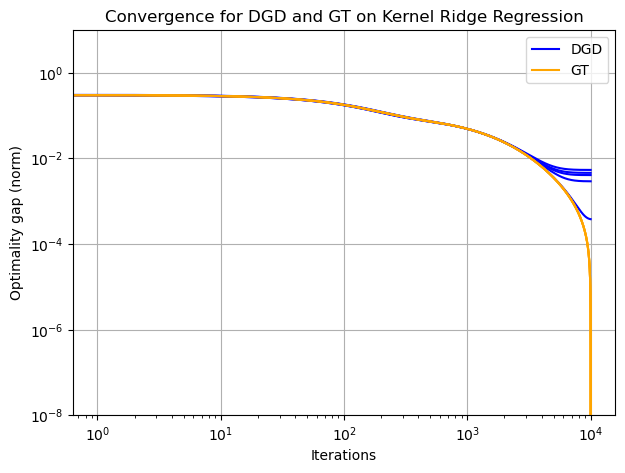

In [13]:
# Tracé des résultats entre DGD et GT
plt.figure(figsize=(7, 5))
plt.plot(agent_1, color='blue')
plt.plot(agent_2, color='blue')
plt.plot(agent_3, color='blue')
plt.plot(agent_4, color='blue')
plt.plot(agent_5, label='DGD', color='blue')

plt.plot(agent_1_GT, color='orange')
plt.plot(agent_2_GT, color='orange')
plt.plot(agent_3_GT, color='orange')
plt.plot(agent_4_GT, label='GT', color='orange')
# plt.plot(agent_5_GT, label='GT', color='orange')

plt.xlabel('Iterations')
plt.ylabel('Optimality gap (norm)')
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-8, 10)
plt.title('Convergence for DGD and GT on Kernel Ridge Regression')
plt.legend()
plt.grid()
plt.show()

## ADMM vs Dual Dec

Time to compute alpha optimal : 0.00021696090698242188

Optimal alpha : [-0.29631768 -0.17017619  0.60505678 -0.31084488  0.57891295  0.66079065
  0.45449954  0.24063941 -0.28918399 -0.28683204]



100%|██████████| 10000/10000 [01:17<00:00, 128.81it/s]


alpha optimal with dual decomposition : [-0.1486564  -0.11711917  0.39248219 -0.17755462  0.36920599  0.38692716
  0.28882576  0.17908958 -0.17212701 -0.14071745]
Time to compute alpha optimal with dual decomposition : 77.65011501312256
alpha_optim shape: (5, 10)
alpha_list shape: (10001, 5, 10)


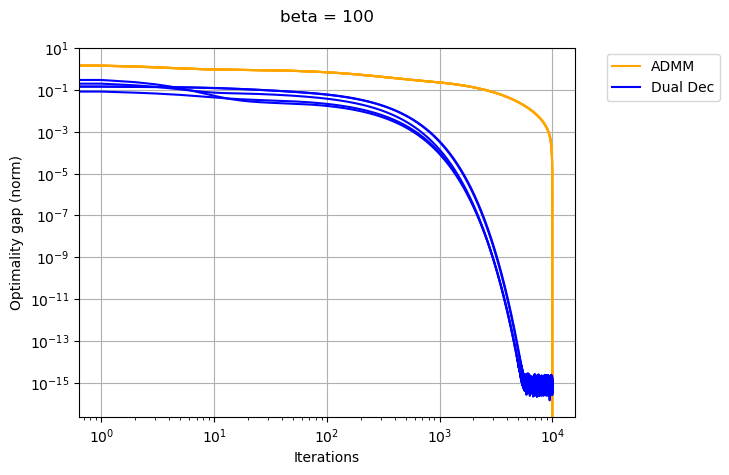

In [16]:
beta = 100
start = time.time()
alpha_optimal = compute_alpha_star(Kmm, Knm, y_n, sigma2, nu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'Optimal alpha : {alpha_optimal}\n')

#Execution de dual decomposition
start = time.time()
alpha_optim, alpha_list, alpha_mean_list = dualDec(
    x_n, y_n, x_selected, selected_pts_agents,
    K, sigma, nu, 0.1, W, max_iter=10000, lamb0=0.
)
end = time.time()
print(f'alpha optimal with dual decomposition : {alpha_optim}')
print(
    f'Time to compute alpha optimal with dual decomposition : {end - start}')


# Exécution d'ADMM
start = time.time()
alpha_optim_admm, alpha_list_admm, alpha_mean_list_admm, opt_gaps_admm = ADMM(x_n, y_n, x_selected, selected_pts_agents, a, nu, sigma2, 10000, W, K, beta)
admm_time = time.time() - start

# Vérification des dimensions
print(f"alpha_optim shape: {alpha_optim_admm.shape}")
print(f"alpha_list shape: {np.array(alpha_list_admm).shape}")
# Data visualization
Y = np.linalg.norm(alpha_list - alpha_optim, axis=1)
# Calcul des écarts de norme pour chaque agent dual dec
agent_1 = np.linalg.norm(np.array(
    [alpha_list[i][0] for i in range(len(alpha_list))]) - alpha_optim, axis=1)
agent_2 = np.linalg.norm(np.array(
    [alpha_list[i][1] for i in range(len(alpha_list))]) - alpha_optim, axis=1)
agent_3 = np.linalg.norm(np.array(
    [alpha_list[i][2] for i in range(len(alpha_list))]) - alpha_optim, axis=1)
agent_4 = np.linalg.norm(np.array(
    [alpha_list[i][3] for i in range(len(alpha_list))]) - alpha_optim, axis=1)
agent_5 = np.linalg.norm(np.array(
    [alpha_list[i][4] for i in range(len(alpha_list))]) - alpha_optim, axis=1)
# Calcul des écarts de norme pour chaque agent admm
agent_1_admm = np.linalg.norm(np.array([alpha_list_admm[i][0] for i in range(len(alpha_list_admm))]) - alpha_optim_admm[0], axis=1)
agent_2_admm = np.linalg.norm(np.array([alpha_list_admm[i][1] for i in range(len(alpha_list_admm))]) - alpha_optim_admm[1], axis=1)
agent_3_admm = np.linalg.norm(np.array([alpha_list_admm[i][2] for i in range(len(alpha_list_admm))]) - alpha_optim_admm[2], axis=1)
agent_4_admm = np.linalg.norm(np.array([alpha_list_admm[i][3] for i in range(len(alpha_list_admm))]) - alpha_optim_admm[3], axis=1)
agent_5_admm = np.linalg.norm(np.array([alpha_list_admm[i][4] for i in range(len(alpha_list_admm))]) - alpha_optim_admm[4], axis=1)

    # Tracé des résultats
plt.plot(agent_1_admm, label='ADMM', color='orange')
plt.plot(agent_2_admm, color='orange')
plt.plot(agent_3_admm, color='orange')
plt.plot(agent_4_admm, color='orange')
plt.plot(agent_5_admm, color='orange')
plt.plot(agent_1, label='Dual Dec', color='blue')
plt.plot(agent_2, color='blue')
plt.plot(agent_3, color='blue')
plt.plot(agent_4, color='blue')
plt.plot(agent_5, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Optimality gap (norm)')
plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'beta = {beta}\n')
#plt.savefig('opt_gaps_dual_dec_vs_admm.png', bbox_inches='tight')
plt.grid()
plt.show()

## Part II - Classes 2 & 4

In [24]:
with open('second_database.pkl', 'rb') as f:
    X, Y = pickle.load(f)

In [25]:
plot_results_different_sel_clients()

NameError: name 'plot_results_different_sel_clients' is not defined

In [25]:
x_m_points=np.linspace(-1,1,m)